In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df=pd.read_csv(filename,header=None,names=headers)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [2]:
df.shape

(205, 26)

# As there are several missing datas, we have to fill them in for further analysis.
 * In this step we have to correct the data type
 * to do that first we have to fill up the Nan or missing data

In [3]:
df.replace('?',np.nan,inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
missing_data=df.isnull()
missing_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
# using a for loop to find the missing values for all the columns
for column in missing_data.columns:
    print(column)
    print(missing_data[column].value_counts())
    print('')

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

* Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely. So, we can fill the missing value using the mean if the value is numerical. We will use frequency if the value is categorical

In [6]:
avg_norm=df['normalized-losses'].astype('float').mean(axis=0)
print(avg_norm)
df['normalized-losses'].replace(np.nan,avg_norm,inplace=True)

122.0


In [7]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [8]:
# the frequency for 4-door is higher. So ,we will use 
df['num-of-doors'].replace(np.nan,'four',inplace=True)

In [9]:
avg_bore=df['bore'].astype('float').mean(axis=0)
print(avg_bore)
df['bore'].replace(np.nan,avg_bore,inplace=True)

3.3297512437810943


In [10]:
avg_stroke=df['stroke'].astype('float').mean(axis=0)
print(avg_stroke)
df['stroke'].replace(np.nan,avg_stroke,inplace=True)

3.255422885572139


In [11]:
avg_hp=df['horsepower'].astype('float').mean(axis=0)
print(avg_hp)
df['horsepower'].replace(np.nan,avg_hp,inplace=True)

104.25615763546799


In [12]:
avg_prpm=df['peak-rpm'].astype('float').mean(axis=0)
print(avg_prpm)
df['peak-rpm'].replace(np.nan,avg_prpm,inplace=True)

5125.369458128079


# Drop the row with no value in column price as we want to predict the price 

In [13]:
df.dropna(subset=['price'],axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)

In [14]:
df.head(20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,122,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [15]:
df.dtypes


symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

*  Converting data types to proper format


In [16]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [17]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

 * L/100km means litre per 100km which is a standard approach.

In [18]:
df['city-L/100km'] = 235/df["city-mpg"]

# Normalization: To group the variables in a similar range ( ML works better with normalized data)

In [19]:
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

In [20]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)

Text(0, 0.5, ' Count')

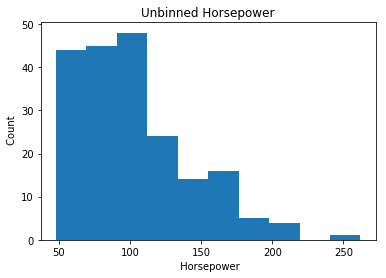

In [21]:
plt.hist(df['horsepower'])
plt.title('Unbinned Horsepower')
plt.xlabel(' Horsepower')
plt.ylabel(' Count')

# As it is hard to interpret the above bar graph , proper binning is inevitable

In [22]:
bin=np.linspace(df['horsepower'].min(),df['horsepower'].max(),4)
group_names = ['Low', 'Medium', 'High']
bin

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [23]:
df['horsepower-binned']=pd.cut(df['horsepower'],bins=bin,labels=group_names,include_lowest=True)
df[['horsepower-binned']].head(10)

,horsepower-binned
0,Low
1,Low
2,Medium
3,Low
4,Low
5,Low
6,Low
7,Low
8,Medium
9,Low


Text(0, 0.5, 'Count')

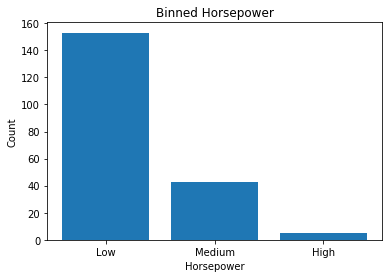

In [24]:
plt.bar(group_names,df["horsepower-binned"].value_counts())
plt.title('Binned Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Count')

In [25]:
df['fuel']=df['fuel-type'].map({'diesel':0,'gas':1})
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,fuel
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,Low,1
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,Low,1
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,Medium,1
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,Low,1
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,Low,1
5,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,3.40,8.5,110,5500.0,19,25,15250.0,12.368421,Low,1
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,3.40,8.5,110,5500.0,19,25,17710.0,12.368421,Low,1
7,1,122,audi,gas,std,four,wagon,fwd,front,105.8,...,3.40,8.5,110,5500.0,19,25,18920.0,12.368421,Low,1
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,3.40,8.3,140,5500.0,17,20,23875.0,13.823529,Medium,1
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,2.80,8.8,101,5800.0,23,29,16430.0,10.217391,Low,1


In [26]:
df.aspiration.value_counts()

std      165
turbo     36
Name: aspiration, dtype: int64

In [27]:

df['numeric-aspiration']=df['aspiration'].map({'turbo':0,'std':1})
df.head(15)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,fuel,numeric-aspiration
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,9.0,111,5000.0,21,27,13495.0,11.190476,Low,1,1
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,9.0,111,5000.0,21,27,16500.0,11.190476,Low,1,1
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,9.0,154,5000.0,19,26,16500.0,12.368421,Medium,1,1
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,10.0,102,5500.0,24,30,13950.0,9.791667,Low,1,1
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,8.0,115,5500.0,18,22,17450.0,13.055556,Low,1,1
5,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,8.5,110,5500.0,19,25,15250.0,12.368421,Low,1,1
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,8.5,110,5500.0,19,25,17710.0,12.368421,Low,1,1
7,1,122,audi,gas,std,four,wagon,fwd,front,105.8,...,8.5,110,5500.0,19,25,18920.0,12.368421,Low,1,1
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,8.3,140,5500.0,17,20,23875.0,13.823529,Medium,1,0
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,8.8,101,5800.0,23,29,16430.0,10.217391,Low,1,1


In [28]:
# To get a rough idea about numerical values
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,fuel,numeric-aspiration
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256874,10.164279,103.402985,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.900498,0.820896
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365650,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,1.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,1.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,1.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [29]:
# to see the type of the feature columns
df.dtypes

symboling                int64
normalized-losses        int32
make                    object
fuel-type               object
aspiration              object
num-of-doors            object
body-style              object
drive-wheels            object
engine-location         object
wheel-base             float64
length                 float64
width                  float64
height                 float64
curb-weight              int64
engine-type             object
num-of-cylinders        object
engine-size              int64
fuel-system             object
bore                   float64
stroke                 float64
compression-ratio      float64
horsepower               int32
peak-rpm               float64
city-mpg                 int64
highway-mpg              int64
price                  float64
city-L/100km           float64
horsepower-binned     category
fuel                     int64
numeric-aspiration       int64
dtype: object

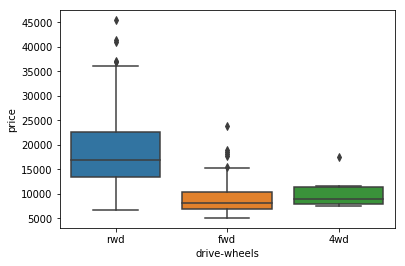

In [30]:
sns.boxplot(x='drive-wheels',y='price',data=df)

In [31]:
# using corr method to see the correlation between the varibales ( A pretty rough idea )
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,fuel,numeric-aspiration
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075810,0.279740,-0.035527,0.036233,-0.082391,0.066171,0.196735,0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217300,0.239543,-0.225016,-0.181877,0.133999,0.238567,0.101546,0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371178,-0.360305,-0.470606,-0.543304,0.584642,0.476153,-0.307237,-0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579795,-0.285970,-0.665192,-0.698142,0.690628,0.657373,-0.211187,-0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615056,-0.245800,-0.633531,-0.680635,0.751265,0.673363,-0.244356,-0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087001,-0.309974,-0.049800,-0.104812,0.135486,0.003811,-0.281578,-0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757981,-0.279361,-0.749543,-0.794889,0.834415,0.785353,-0.221046,-0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822668,-0.256733,-0.650546,-0.679571,0.872335,0.745059,-0.070779,-0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566903,-0.267392,-0.582027,-0.591309,0.543155,0.554610,-0.054458,-0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098128,-0.063561,-0.033956,-0.034636,0.082269,0.036133,-0.241064,-0.218233


In [32]:
df[['bore','stroke','compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566903
stroke,-0.055390,1.000000,0.187871,0.098128
compression-ratio,0.001263,0.187871,1.000000,-0.214489
horsepower,0.566903,0.098128,-0.214489,1.000000


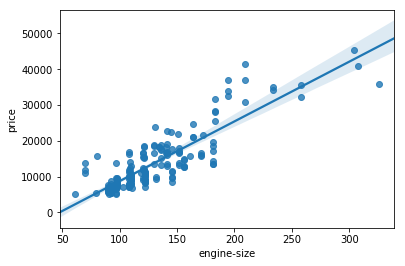

In [33]:
# Regression plot
sns.regplot(x=df['engine-size'],y=df['price'],data=df)

c:\python\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


(0, 56500.28410238566)

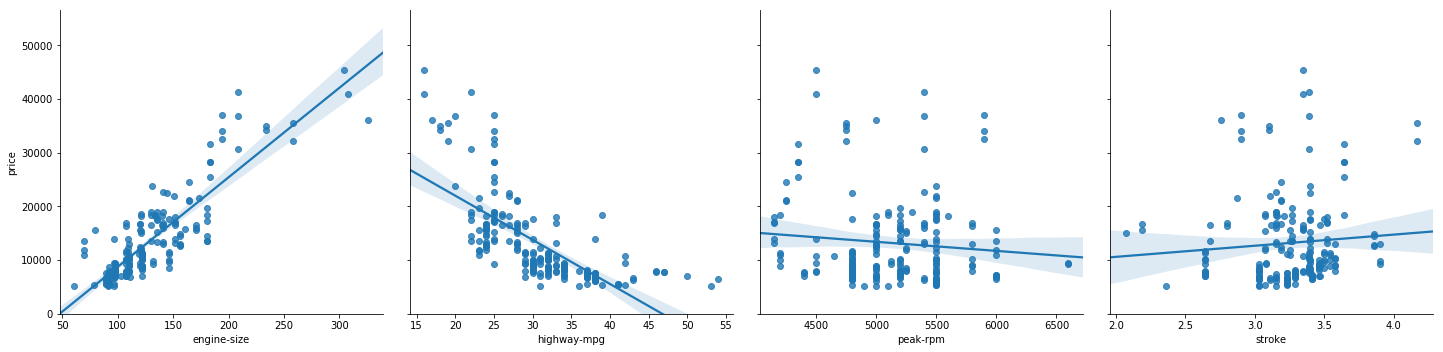

In [34]:
sns.pairplot(df,x_vars=['engine-size','highway-mpg','peak-rpm','stroke'],y_vars=['price'],size=5,aspect=1,kind='reg')
plt.ylim(0,)

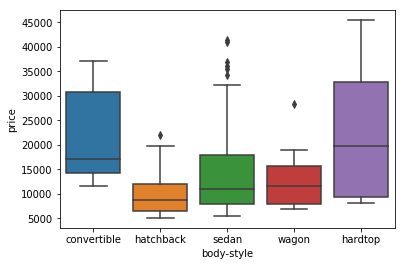

In [35]:
sns.boxplot(x="body-style", y="price", data=df)

* Price difference not much. Not a good predictor (body style)

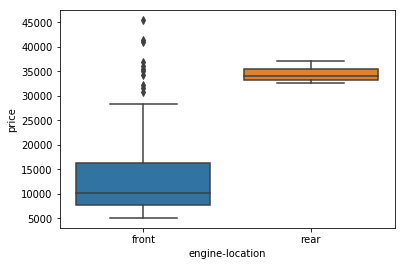

In [36]:
sns.boxplot(x="engine-location", y="price", data=df)

* Price difference high. A good predictor ( engine-location)

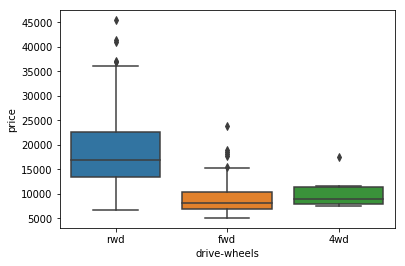

In [37]:
sns.boxplot(x="drive-wheels", y="price", data=df)

* Noticeable price difference. A good predictor (drive wheels)

In [38]:
# Using groupby method to stack up columns with corresponding values ( mean values)
df_grpby=df[['drive-wheels','body-style','price']].groupby(['drive-wheels','body-style'],as_index=False).mean()
df_grpby

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

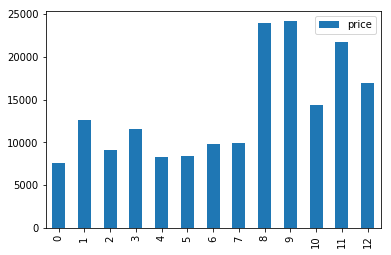

In [39]:
df_grpby.plot(kind='bar')
plt.xticks(rotation=90)

* x label not correct. we have to use pivot table to plot the graph with correct labelling

In [40]:
grpby_pivot=df_grpby.pivot(index='drive-wheels',columns='body-style')
grpby_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [41]:
grpby_pivot.fillna(0)

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

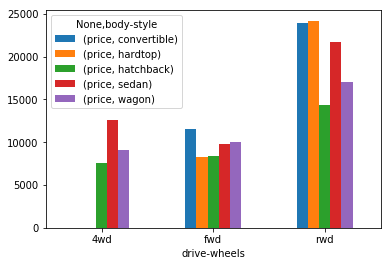

In [42]:
grpby_pivot.plot(kind='bar')
plt.xticks(rotation=0)

* This plot is easy to interpret 

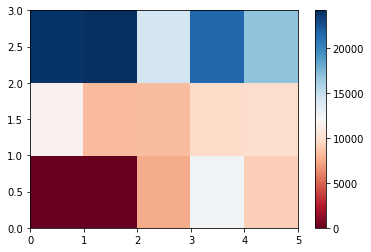

In [43]:
#using the grouped results to plot color map which will provide much insight about the correlation
p=grpby_pivot.fillna(0)
plt.pcolor(p, cmap='RdBu')
plt.colorbar()
plt.show()

* Above heat map is nowhere near interpretation. Modification is inevitable

In [44]:
print(grpby_pivot.shape)
print(grpby_pivot.shape[1])

(3, 5)
5


(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text xticklabel objects>)

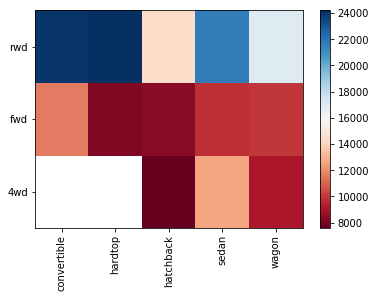

In [45]:
fig,ax=plt.subplots() # subplots is used as there is no way to adjust x and y ticks
im=plt.pcolor(grpby_pivot,cmap='RdBu') # Regular expression
row_labels=grpby_pivot.columns.levels[1] #Levels[0]= price ,Levels[1]= body_style
col_labels=grpby_pivot.index
ax.set_xticks(np.arange(grpby_pivot.shape[1])+.5) # ticks=.5,1.5,2.5,3.5,4.5 shape[1]=5 as there are 5  column
ax.set_yticks(np.arange(grpby_pivot.shape[0])+.5)
ax.set_xticklabels(row_labels)
ax.set_yticklabels(col_labels)
plt.colorbar(im)
plt.xticks(rotation=90)

# Statistical modeling ( helps better understand the relation rigorously)

In [46]:
from scipy import stats

In [47]:
pearson_coeff,p_value=stats.pearsonr(df['wheel-base'], df['price'])
print('pearson_coeff:   ',pearson_coeff)
print('p_value:         ',p_value)

pearson_coeff:    0.5846418222655081
p_value:          8.076488270732955e-20


* Since the p-value is  <  0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585)

In [48]:
# Using for loop to print all the columns' ( Apparently features) for pearson co-efficient and and P value
val=['horsepower','length','width','curb-weight','engine-size','bore','city-mpg','highway-mpg']
for i,c in enumerate(val):
    print(c ,'Vs price ')
    val[0]
    pearson_coeff,p_value=stats.pearsonr(df[val[i]], df['price'])
    print('pearson_coeff:   ',pearson_coeff)
    print('p_value:         ',p_value)
    if p_value<.001:
        print('strong correlation')
    print("")


horsepower Vs price 
pearson_coeff:    0.8096068016571052
p_value:          6.273536270651004e-48
strong correlation

length Vs price 
pearson_coeff:    0.6906283804483642
p_value:          8.016477466158713e-30
strong correlation

width Vs price 
pearson_coeff:    0.7512653440522673
p_value:          9.20033551048166e-38
strong correlation

curb-weight Vs price 
pearson_coeff:    0.8344145257702846
p_value:          2.1895772388936997e-53
strong correlation

engine-size Vs price 
pearson_coeff:    0.8723351674455185
p_value:          9.265491622197996e-64
strong correlation

bore Vs price 
pearson_coeff:    0.5431553832626602
p_value:          8.049189483935364e-17
strong correlation

city-mpg Vs price 
pearson_coeff:    -0.6865710067844677
p_value:          2.3211320655676368e-29
strong correlation

highway-mpg Vs price 
pearson_coeff:    -0.7046922650589529
p_value:          1.7495471144476807e-31
strong correlation



* For categorical value we will use ANOVA [ F test score(the higher,the strong), p-value the lower the strong statistical significance]

In [49]:
df_grpby1=df[['drive-wheels','price']].groupby(['drive-wheels'])
df_grpby1.head(5)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
2,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
6,fwd,17710.0
7,fwd,18920.0
8,fwd,23875.0
9,rwd,16430.0


In [50]:
df_grpby1.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [51]:
f_val,P_val=stats.f_oneway(df_grpby1.get_group('4wd')['price'],df_grpby1.get_group('fwd')['price'],df_grpby1.get_group('rwd')['price'])
print('F_test_score   :  ',f_val)
print('P_val          :  ',P_val)

F_test_score   :   67.95406500780399
P_val          :   3.3945443577151245e-23


*  strong correlation and strong statistical significance

In [52]:
f_val,P_val=stats.f_oneway(df_grpby1.get_group('4wd')['price'],df_grpby1.get_group('fwd')['price'])
print('F_test_score   :  ',f_val)
print('P_val          :  ',P_val)

F_test_score   :   0.665465750252303
P_val          :   0.41620116697845666


 *  weak correlation and weak statistical significance

In [53]:
f_val,P_val=stats.f_oneway(df_grpby1.get_group('4wd')['price'],df_grpby1.get_group('rwd')['price'])
print('F_test_score   :  ',f_val)
print('P_val          :  ',P_val)

F_test_score   :   8.580681368924756
P_val          :   0.004411492211225333


In [54]:
f_val,P_val=stats.f_oneway(df_grpby1.get_group('rwd')['price'],df_grpby1.get_group('fwd')['price'])
print('F_test_score   :  ',f_val)
print('P_val          :  ',P_val)

F_test_score   :   130.55331609591104
P_val          :   2.235530635567824e-23


In [55]:
df_grpby2=df[['body-style','price']].groupby(['body-style'])
df_grpby2.head(2)

,body-style,price
0,convertible,13495.0
1,convertible,16500.0
2,hatchback,16500.0
3,sedan,13950.0
4,sedan,17450.0
7,wagon,18920.0
17,hatchback,5151.0
27,wagon,8921.0
66,hardtop,28176.0
71,hardtop,45400.0


In [56]:
f_val,P_val=stats.f_oneway(df_grpby2.get_group('convertible')['price'],df_grpby2.get_group('sedan')['price'],df_grpby2.get_group('hatchback')['price'],df_grpby2.get_group('wagon')['price'],df_grpby2.get_group('hardtop')['price'])
print('F_test_score   :  ',f_val)
print('P_val          :  ',P_val)

F_test_score   :   9.12875185470821
P_val          :   8.779795237614595e-07


* Conclusion: Important Variables
We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

Continuous numerical variables:

* Length
* Width
* Curb-weight
* Engine-size
* Horsepower
* City-mpg
* Highway-mpg
* Wheel-base
* Bore

Categorical variables:
* Drive-wheels
* Body-style

# Behold! Machine Learning (ML) steps in:

# Linear Regression: As the problem is regression (continuous/numerical) 

In [57]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [58]:
X=df[['highway-mpg']]
y=df['price']
print(X.shape)
print(y.shape)

(201, 1)
(201,)


In [59]:
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [60]:
lm.intercept_

38423.305858157386

In [61]:
lm.coef_

array([-821.73337832])

In [62]:
y_pred=lm.predict(X)
y_pred[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

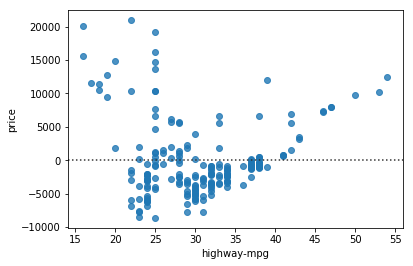

In [63]:
sns.residplot(x=df['highway-mpg'],y=df['price'])

* Points on this residual plot are not randomly spread around x-axis. So, a non-linear approach is what we need to do.

In [64]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z,y)
y_pred_Z=lm.predict(Z)
y_pred_Z.shape

(201,)

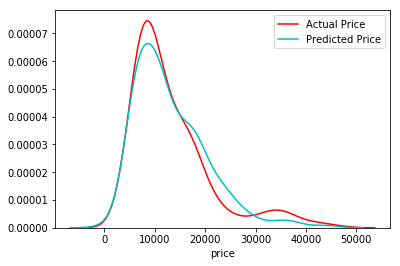

In [65]:
ax1=sns.distplot(df['price'],hist=False,color='r',label='Actual Price')
sns.distplot(y_pred_Z,hist=False,color='c',label='Predicted Price')

In [66]:
print(df['highway-mpg'].min(),df['highway-mpg'].max())

16 54


        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05
[-1.55663829e+00  2.04754306e+02 -8.96543312e+03  1.37923594e+05]


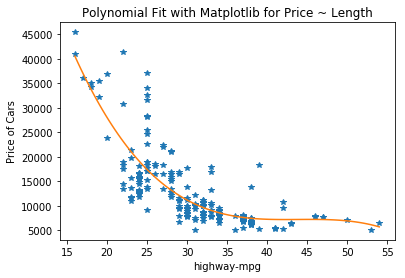

In [67]:
def pollyplot(model,indep_var,depend_var,name):
    x_new=np.linspace(16,54,100)
    y_new=model(x_new)
    plt.plot(indep_var,depend_var,'*',x_new,y_new)
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    plt.xlabel(name)
    plt.ylabel('Price of Cars')
x=df['highway-mpg']
y=df['price']
f=np.polyfit(x,y,3)
p=np.poly1d(f)
print(p)
print(f)
pollyplot(p,x,y,'highway-mpg')    
    

In [68]:
from sklearn.metrics import mean_squared_error


#  Linear Regression (Model-1)

In [69]:
lm.fit(X,y)
y_pred_lm=lm.predict(X)
print('predicted price   :',y_pred_lm[0:5])
print('R^2               :',lm.score(X,y))
print('mean squared error:',mean_squared_error(y,y_pred_lm))


predicted price   : [16236.50464347 16236.50464347 17058.23802179 13771.3045085
 20345.17153508]
R^2               : 0.4965911884339175
mean squared error: 31635042.944639895


#  Multiple Linear Regression (Model-2)

In [70]:
lm.fit(Z,y)
y_pred_lm=lm.predict(Z)
print('predicted price   :',y_pred_lm[0:5])
print('R^2               :',lm.score(Z,y))
print('mean squared error:',mean_squared_error(y,y_pred_lm))


predicted price   : [13699.07700462 13699.07700462 19052.71346719 10620.61524404
 15520.90025344]
R^2               : 0.8093732522175299
mean squared error: 11979300.34981888


# Polynomial Regression (Model-3)

In [71]:
from sklearn.metrics import r2_score

print('R^2               :',r2_score(y,p(x)))
print('mean squared error:',mean_squared_error(y,p(x)))


R^2               : 0.6741946663906515
mean squared error: 20474146.426361237


In [72]:
df._get_numeric_data()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,fuel,numeric-aspiration
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.00,111,5000.0,21,27,13495.0,11.190476,1,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.00,111,5000.0,21,27,16500.0,11.190476,1,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.00,154,5000.0,19,26,16500.0,12.368421,1,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.00,102,5500.0,24,30,13950.0,9.791667,1,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.00,115,5500.0,18,22,17450.0,13.055556,1,1
5,2,122,99.8,0.851994,0.920833,53.1,2507,136,3.19,3.40,8.50,110,5500.0,19,25,15250.0,12.368421,1,1
6,1,158,105.8,0.925997,0.991667,55.7,2844,136,3.19,3.40,8.50,110,5500.0,19,25,17710.0,12.368421,1,1
7,1,122,105.8,0.925997,0.991667,55.7,2954,136,3.19,3.40,8.50,110,5500.0,19,25,18920.0,12.368421,1,1
8,1,158,105.8,0.925997,0.991667,55.9,3086,131,3.13,3.40,8.30,140,5500.0,17,20,23875.0,13.823529,1,0
9,2,192,101.2,0.849592,0.900000,54.3,2395,108,3.50,2.80,8.80,101,5800.0,23,29,16430.0,10.217391,1,1


In [73]:
X=df[['symboling', 'normalized-losses','wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size',
       'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm',
       'city-mpg', 'highway-mpg', 'fuel']]
Y=df['price']

In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.15,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(170, 16)
(31, 16)
(170,)
(31,)


In [85]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(y_pred.shape)
print(y_test.shape)

(31,)
(31,)


In [91]:
lr.score(X_test,y_test)

0.8493829247193059